## Classification demo including training

In [51]:
from PIL import Image

# most of the images are in the dcm format which we can be opened through specific software here i am using RadiAnt 

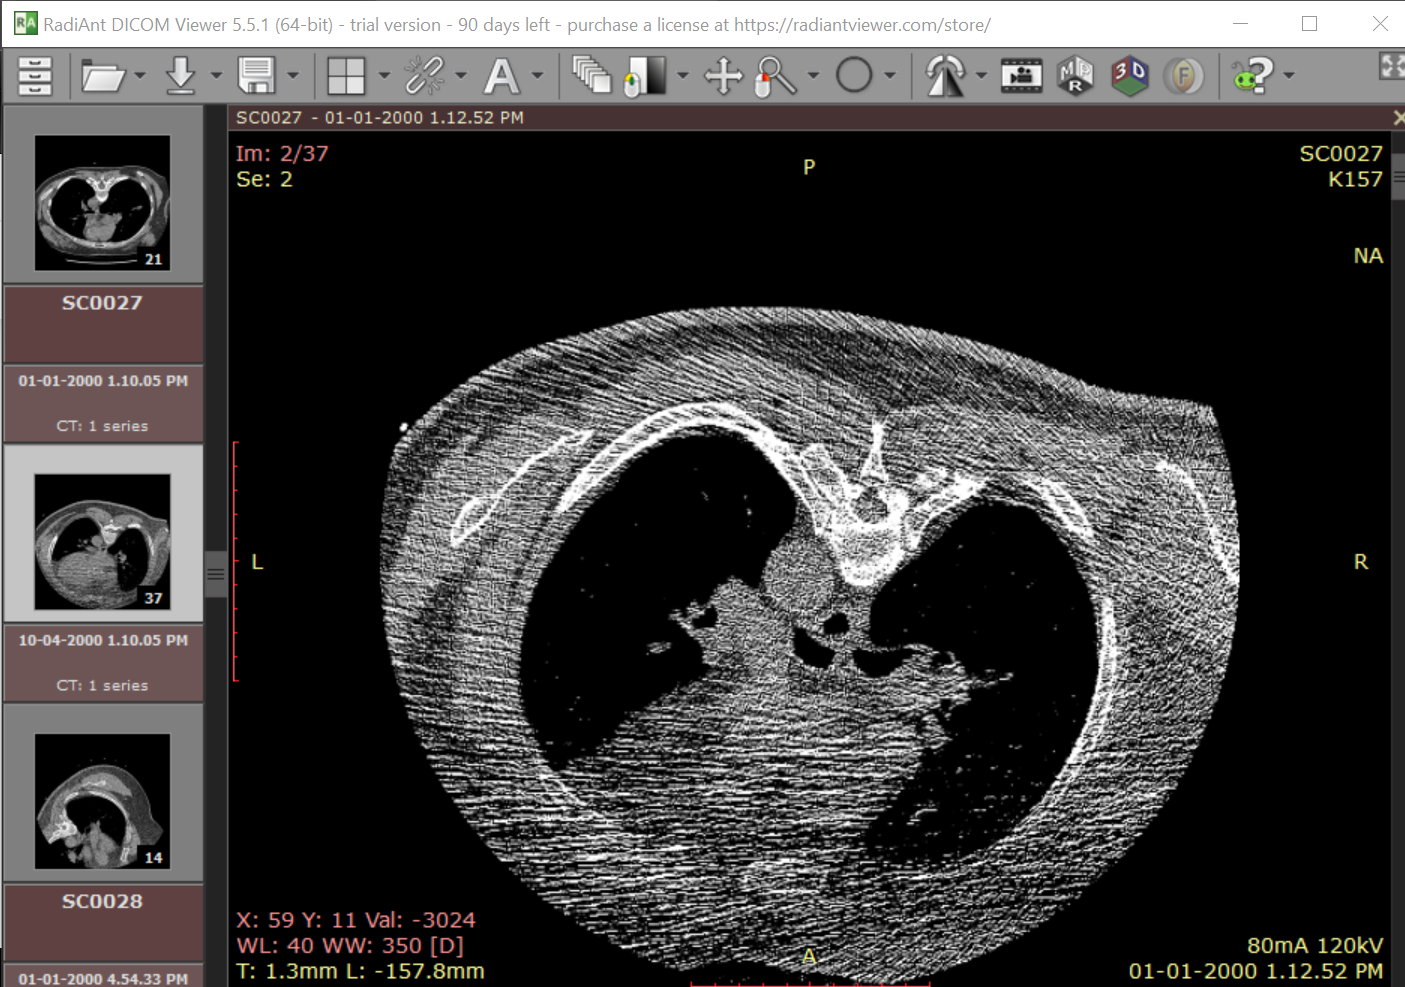

In [52]:
Image.open("Annotation 2020-02-03 105745.png")

# tumarous image 

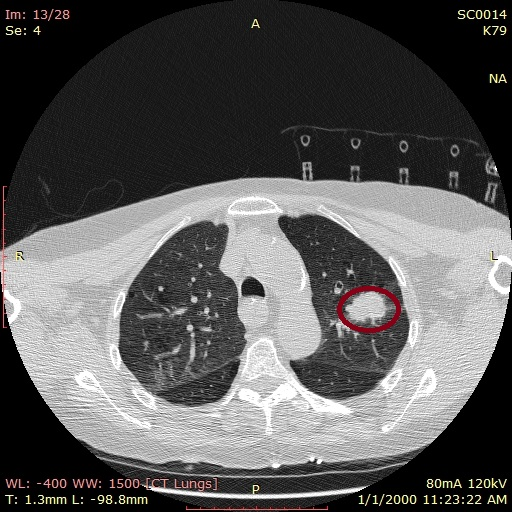

In [55]:
Image.open("tm1.jpg")

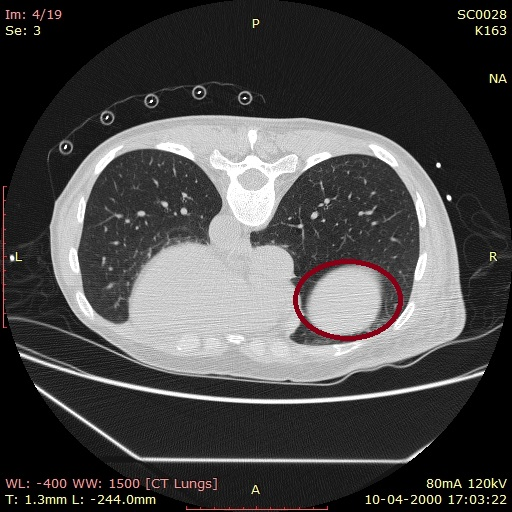

In [56]:
Image.open("tm2.jpg")

# Non Tumarous Image

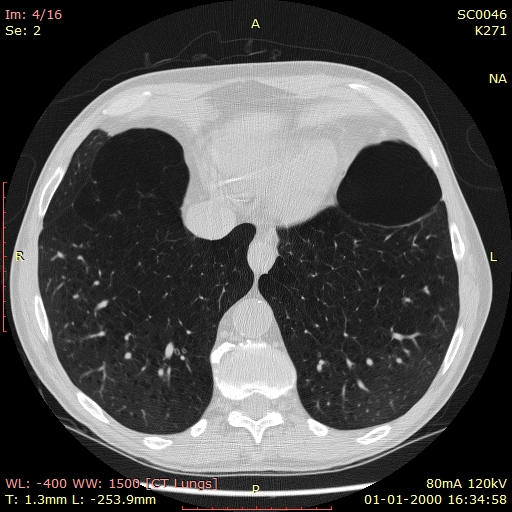

In [57]:
Image.open("ntm1.jpg")

In [58]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [73]:
## Initialising the CNN
classifier = Sequential()

In [74]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [75]:
## Flattening
classifier.add(Flatten())

In [76]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [77]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [78]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

## data importing and transforming and scaling

In [80]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [81]:
## Importing training data
train_set = train_datagen.flow_from_directory('E:/Data_Science/analytics_vidya/lung-cancer-project/lung_cancer_converted/train/',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 1690 images belonging to 2 classes.


In [82]:
train_set.class_indices

{'cancer_': 0, 'non_cancer': 1}

In [83]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cancer_': 0, 'non_cancer': 1}


In [84]:
## Importng test data
test_set = test_datagen.flow_from_directory('E:/Data_Science/analytics_vidya/lung-cancer-project/lung_cancer_converted/test/',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 72 images belonging to 2 classes.


In [85]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=8,
        validation_data=test_set
        )

Epoch 1/8
53/53 [==============================] - 20s 385ms/step - loss: 0.6786 - accuracy: 0.5882 - val_loss: 0.6865 - val_accuracy: 0.4167
Epoch 2/8
53/53 [==============================] - 19s 353ms/step - loss: 0.6609 - accuracy: 0.6006 - val_loss: 0.6090 - val_accuracy: 0.6667
Epoch 3/8
53/53 [==============================] - 21s 388ms/step - loss: 0.6198 - accuracy: 0.6657 - val_loss: 0.7507 - val_accuracy: 0.5139
Epoch 4/8
53/53 [==============================] - 19s 367ms/step - loss: 0.5723 - accuracy: 0.7166 - val_loss: 0.5797 - val_accuracy: 0.5278
Epoch 5/8
53/53 [==============================] - 18s 345ms/step - loss: 0.4852 - accuracy: 0.7716 - val_loss: 0.6359 - val_accuracy: 0.7639
Epoch 6/8
53/53 [==============================] - 18s 349ms/step - loss: 0.3588 - accuracy: 0.8462 - val_loss: 0.5378 - val_accuracy: 0.7778
Epoch 7/8
53/53 [==============================] - 17s 330ms/step - loss: 0.3031 - accuracy: 0.8763 - val_loss: 0.4693 - val_accuracy: 0.8194
Epoch 

#  we get 81% validation accuracy 